In [291]:
import os

In [292]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy import stats

In [293]:
import lib

In [294]:
for shear_step in lib.const.SHEAR_STEPS:

    match_filename = f"match_{shear_step}.hdf5"
    match_file = os.path.join(
        "/pscratch/sd/s/smau/fiducial-matches-noshear",
        match_filename,
    )

    with (
        h5py.File(
            lib.const.SIM_MATCH_CATALOGS[shear_step],
            mode="r",
        ) as hf_wide,    
        h5py.File(
            match_file,
            mode="r",
        ) as hf_match,
    ):
        wide_uid = hf_wide["mdet"]["noshear"]["uid"][:]
        match_uid = hf_match["mdet"]["noshear"]["uid"][:]

        wide_z = hf_wide["mdet"]["noshear"]["z"][:]
        match_z = hf_match["mdet"]["noshear"]["z"][:]

        try:
            np.testing.assert_equal(wide_z, match_z)
        except:
            print(shear_step)

        # print(
        #     shear_step,
        #     sum(~np.isnan(wide_uid)),
        #     sum(~np.isnan(match_uid)),
        #     100 * sum(~np.isnan(match_uid)) / sum(~np.isnan(wide_uid)),
        # )

g1_slice=-0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0
g1_slice=0.02__g2_slice=0.00__g1_other=-0.02__g2_other=0.00__zlow=2.4__zhigh=2.7


In [295]:
shear_step = "g1_slice=0.02__g2_slice=0.00__g1_other=0.00__g2_other=0.00__zlow=0.0__zhigh=6.0"

In [296]:
shear = h5py.File(lib.const.SIM_SHEAR_CATALOGS[shear_step])

In [297]:
match_filename = f"match_{shear_step}.hdf5"
match_file = os.path.join(
    "/pscratch/sd/s/smau/fiducial-matches-noshear",
    match_filename,
)
match = h5py.File(match_file)

In [298]:
weight = h5py.File(lib.const.SIM_WEIGHT_CATALOGS[shear_step])

In [299]:
tomo = h5py.File(lib.const.SIM_TOMOGRAPHY_CATALOGS[shear_step])

In [300]:
bins = np.linspace(0, 3, 101)

nz, _, _ = stats.binned_statistic(
    match["mdet"]["noshear"]["z"][:],
    weight["mdet"]["noshear"]["statistical_weight"][:] * lib.response.get_shear_response(shear["mdet"]["noshear"]),
    statistic="sum",
    bins=bins,
)
nz = nz / np.nansum(nz)

nz_g_p, _, _ = stats.binned_statistic(
    match["mdet"]["1p"]["z"][:],
    shear["mdet"]["1p"]["gauss_g_1"][:] * weight["mdet"]["1p"]["statistical_weight"][:],
    statistic="sum",
    bins=bins,
)
g_p = np.average(shear["mdet"]["1p"]["gauss_g_1"][:], weights=weight["mdet"]["1p"]["statistical_weight"][:])


nz_g_m, _, _ = stats.binned_statistic(
    match["mdet"]["1m"]["z"][:],
    shear["mdet"]["1m"]["gauss_g_1"][:] * weight["mdet"]["1m"]["statistical_weight"][:],
    statistic="sum",
    bins=bins,
)
g_m = np.average(shear["mdet"]["1m"]["gauss_g_1"][:], weights=weight["mdet"]["1m"]["statistical_weight"][:])

Rnz = (nz_g_p - nz_g_m) / (g_p - g_m)
Rnz = Rnz / np.nansum(Rnz)

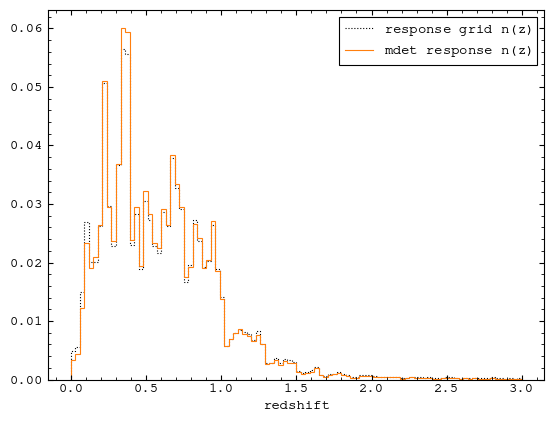

In [301]:
plt.stairs(
    nz,
    bins,
    ec="k",
    ls=":",
    label="response grid $n(z)$",
)
plt.stairs(
    Rnz,
    bins,
    label="mdet response $n(z)$",
)
plt.xlabel("redshift")
plt.legend()
plt.show()

In [308]:
# bins = np.linspace(0, 3, 61)
bins = np.array([0.0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 6.0])

nz = {}
Rnz = {}

for i in lib.const.TOMOGRAPHIC_BINS:
    in_tomo_ns = (tomo["sompz"]["noshear"]["bhat"][:] == i)
    
    _nz, _, _ = stats.binned_statistic(
        match["mdet"]["noshear"]["z"][:][in_tomo_ns],
        weight["mdet"]["noshear"]["statistical_weight"][:][in_tomo_ns] * lib.response.get_shear_response(shear["mdet"]["noshear"])[in_tomo_ns],
        statistic="sum",
        bins=bins,
    )
    _nz = _nz / np.nansum(_nz)
    nz[i] = _nz

    in_tomo_1p = (tomo["sompz"]["1p"]["bhat"][:] == i)
    
    _nz_g_p, _, _ = stats.binned_statistic(
        match["mdet"]["1p"]["z"][:][in_tomo_1p],
        shear["mdet"]["1p"]["gauss_g_1"][:][in_tomo_1p] * weight["mdet"]["1p"]["statistical_weight"][:][in_tomo_1p],
        statistic="sum",
        bins=bins,
    )
    _g_p = np.average(shear["mdet"]["1p"]["gauss_g_1"][:][in_tomo_1p], weights=weight["mdet"]["1p"]["statistical_weight"][:][in_tomo_1p])

    in_tomo_1m = (tomo["sompz"]["1m"]["bhat"][:] == i)
    
    _nz_g_m, _, _ = stats.binned_statistic(
        match["mdet"]["1m"]["z"][:][in_tomo_1m],
        shear["mdet"]["1m"]["gauss_g_1"][:][in_tomo_1m] * weight["mdet"]["1m"]["statistical_weight"][:][in_tomo_1m],
        statistic="sum",
        bins=bins,
    )
    _g_m = np.average(shear["mdet"]["1m"]["gauss_g_1"][:][in_tomo_1m], weights=weight["mdet"]["1m"]["statistical_weight"][:][in_tomo_1m])
    
    _Rnz = (_nz_g_p - _nz_g_m) / (_g_p - _g_m)
    _Rnz = _Rnz / np.nansum(_Rnz)
    Rnz[i] = _Rnz

0 -0.004602365352636195
1 -0.012617335860039547
2 -0.0016604058794377208
3 -0.0255450457760249


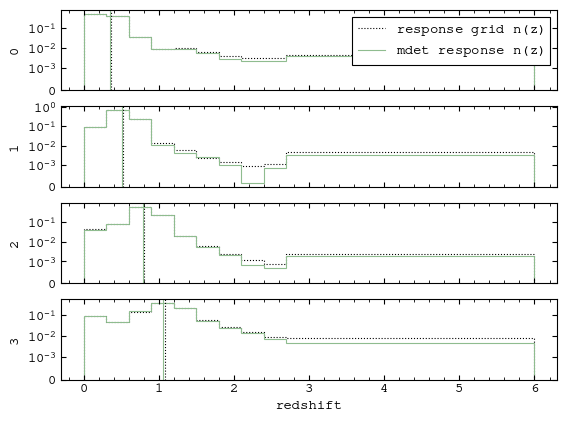

In [309]:
fig, axs = plt.subplots(4, 1, sharex=True)

for i in lib.const.TOMOGRAPHIC_BINS:
    meanz_1 = np.average(0.5 * (bins[:-1] + bins[1:]), weights=nz[i])
    axs[i].axvline(meanz_1, c="k", ls=":")
    axs[i].stairs(
        nz[i],
        bins,
        ec="k",
        ls=":",
        label="response grid $n(z)$",
    )
    meanz_2 = np.average(0.5 * (bins[:-1] + bins[1:]), weights=Rnz[i])
    axs[i].axvline(meanz_2, c="darkseagreen")
    axs[i].stairs(
        Rnz[i],
        bins,
        ec="darkseagreen",
        label="mdet response $n(z)$",
    )
    axs[i].set_ylabel(i)
    axs[i].set_yscale("symlog", linthresh=1e-3)
    print(i, meanz_2 - meanz_1)
axs[-1].set_xlabel("redshift")
axs[0].legend()
plt.show()

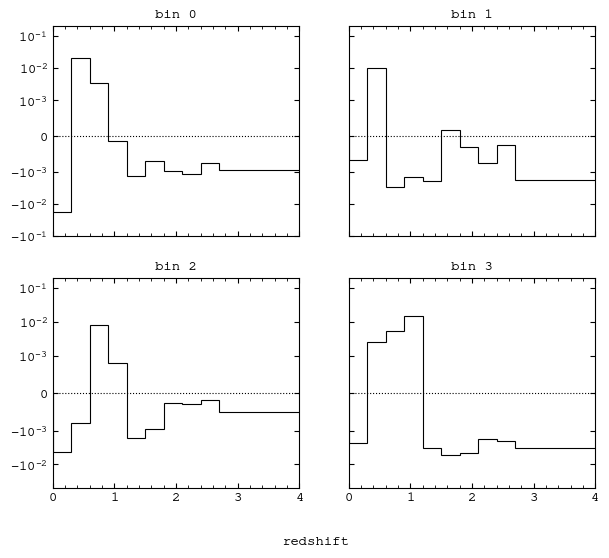

In [320]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey="row")
axs = axs.ravel()

for i in lib.const.TOMOGRAPHIC_BINS:
    axs[i].axhline(0, ls=":")
    axs[i].stairs(
        Rnz[i] - nz[i],
        bins,
        ec="k",
    )
    # axs[i].set_ylabel(i)
    axs[i].set_xlim(0, 4)
    axs[i].set_yscale("symlog", linthresh=1e-3)
    if i < 2:
        axs[i].set_ylim(-1e-1, 2e-1)
    else:
        axs[i].set_ylim(-5e-2, 2e-1)
    axs[i].set_title(f"bin {i}")
fig.supxlabel("redshift")
# fig.suptitle("mdet response weighted - grid response weighted")
plt.show()

In [227]:
hf = h5py.File("data.hdf5")

In [228]:
hf["redshift"].keys()

<KeysViewHDF5 ['bin0', 'bin1', 'bin2', 'bin3', 'zbinsc', 'zedges']>

In [285]:
# from Boyan
ZBINSC = np.arange(0.035, 4, 0.05)
ZEDGES = np.arange(0.01, 4.02, 0.05)

def compute_nz(
    shear_step,
    zedges=ZEDGES,
    zbinsc=ZBINSC,
):
    tomographic_bins = lib.const.TOMOGRAPHIC_BINS
    cell_assignments = lib.const.CELL_ASSIGNMENTS
    cell_ids = lib.const.CELL_IDS

    match_filename = f"match_{shear_step}.hdf5"
    match_file = os.path.join(
        "/pscratch/sd/s/smau/fiducial-matches-noshear",
        match_filename,
    )

    with (
        h5py.File(lib.const.SIM_SHEAR_CATALOGS[shear_step]) as shear,
        h5py.File(match_file) as truth,
        h5py.File(lib.const.SIM_TOMOGRAPHY_CATALOGS[shear_step]) as tomo,
        h5py.File(lib.const.SIM_WEIGHT_CATALOGS[shear_step]) as weight,
    ):

        cells_1p = tomo["sompz"]["1p"]["cell_wide"][:]
        zs_1p = truth["mdet"]["1p"]["z"][:]
        g1_1p = shear["mdet"]["1p"]["gauss_g_1"][:]
        w_1p = weight["mdet"]["1p"]["statistical_weight"][:]

        cells_1m = tomo["sompz"]["1m"]["cell_wide"][:]
        zs_1m = truth["mdet"]["1m"]["z"][:]
        g1_1m = shear["mdet"]["1m"]["gauss_g_1"][:]
        w_1m = weight["mdet"]["1m"]["statistical_weight"][:]

        _zs = np.copy(zs_1p)
        _zs[_zs < zbinsc[0]] = zbinsc[0] + 0.001
        _zs[_zs > zbinsc[-1]] = zbinsc[-1] - 0.001
    
        _g_nz_1p, _, _, _ = stats.binned_statistic_2d(
            cells_1p,
            _zs,
            w_1p * g1_1p,
            statistic="sum",
            bins=[cell_ids, zedges],
        )

        _zs = np.copy(zs_1m)
        _zs[_zs < zbinsc[0]] = zbinsc[0] + 0.001
        _zs[_zs > zbinsc[-1]] = zbinsc[-1] - 0.001
    
        _g_nz_1m, _, _, _ = stats.binned_statistic_2d(
            cells_1m,
            _zs,
            w_1m * g1_1m,
            statistic="sum",
            bins=[cell_ids, zedges],
        )

        _dg_1 = np.average(g1_1p, weights=w_1p) - np.average(g1_1m, weights=w_1m)
        _dgnz_1 = (_g_nz_1p / np.sum(w_1p) - _g_nz_1m / np.sum(w_1m))

        cells_2p = tomo["sompz"]["2p"]["cell_wide"][:]
        zs_2p = truth["mdet"]["2p"]["z"][:]
        g2_2p = shear["mdet"]["2p"]["gauss_g_1"][:]
        w_2p = weight["mdet"]["2p"]["statistical_weight"][:]

        cells_2m = tomo["sompz"]["2m"]["cell_wide"][:]
        zs_2m = truth["mdet"]["2m"]["z"][:]
        g2_2m = shear["mdet"]["2m"]["gauss_g_1"][:]
        w_2m = weight["mdet"]["2m"]["statistical_weight"][:]

        _zs = np.copy(zs_2p)
        _zs[_zs < zbinsc[0]] = zbinsc[0] + 0.001
        _zs[_zs > zbinsc[-1]] = zbinsc[-1] - 0.001
    
        _g_nz_2p, _, _, _ = stats.binned_statistic_2d(
            cells_2p,
            _zs,
            w_2p * g2_2p,
            statistic="sum",
            bins=[cell_ids, zedges],
        )

        _zs = np.copy(zs_2m)
        _zs[_zs < zbinsc[0]] = zbinsc[0] + 0.001
        _zs[_zs > zbinsc[-1]] = zbinsc[-1] - 0.001
    
        _g_nz_2m, _, _, _ = stats.binned_statistic_2d(
            cells_2m,
            _zs,
            w_2m * g2_2m,
            statistic="sum",
            bins=[cell_ids, zedges],
        )

        _dg_2 = np.average(g2_2p, weights=w_2p) - np.average(g2_2m, weights=w_2m)
        _dgnz_2 = (_g_nz_2p / np.sum(w_2p) - _g_nz_2m / np.sum(w_2m))

        _nz = 0.5 * (_dgnz_1 + _dgnz_2)
        # _nz = 0.5 * (_dgnz_1 / _dg_1 + _dgnz_2 / _dg_2) 
        # _nz = 2 / (
        #     _dg_1 / _dgnz_1
        #     + _dg_2 / _dgnz_2
        # )  # harmonic mean
            
        nz = {}
        for tomographic_bin in tomographic_bins:
            nz[tomographic_bin] = np.sum(
                _nz[cell_assignments[tomographic_bin]],
                axis=0,
            )
    
            # renormalize
            nz[tomographic_bin] = nz[tomographic_bin] / np.sum(nz[tomographic_bin]) / np.diff(zedges)

    return nz, zedges, zbinsc

In [286]:
nz, zedges, zbinsc = compute_nz(shear_step)

In [287]:
for i in range(4):
    _nz = hf["redshift"][f"bin{i}"][:]
    print(i, sum(_nz[_nz > 0]))

0 20.00193787235106
1 20.008786007562456
2 20.009166842571535
3 20.00360059694019


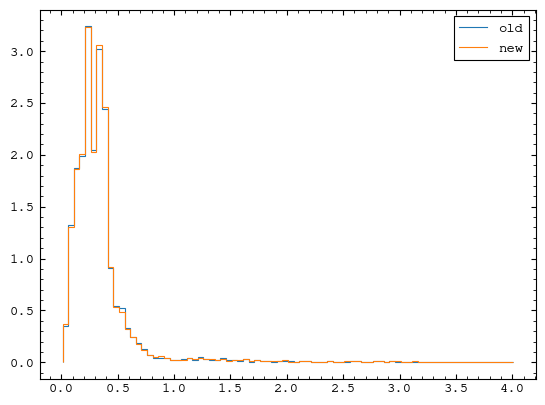

In [288]:
plt.stairs(hf["redshift"]["bin0"][:], zedges, label="old")
plt.stairs(nz[0], zedges, label="new")
plt.legend()
plt.show()

0 0.001627291801299502
1 -0.0034715196740210397
2 0.004406807747554531
3 0.00393983904228401


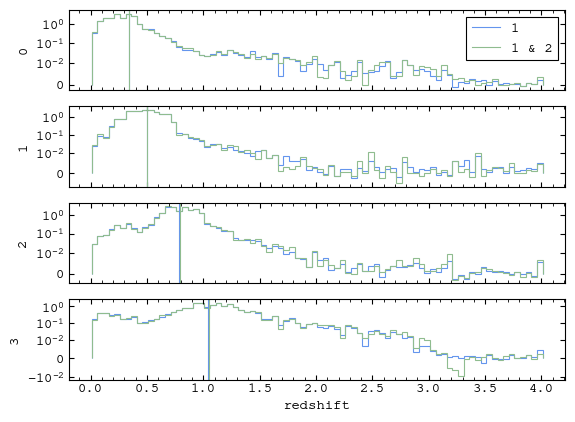

In [289]:
fig, axs = plt.subplots(4, 1, sharex=True)

for i in lib.const.TOMOGRAPHIC_BINS:
    meanz_1 = np.average(zbinsc, weights=hf["redshift"][f"bin{i}"][:])
    axs[i].axvline(meanz_1, c="cornflowerblue")
    axs[i].stairs(
        hf["redshift"][f"bin{i}"][:],
        zedges,
        ec="cornflowerblue",
        label="1",
    )
    meanz_2 = np.average(zbinsc, weights=nz[i])
    axs[i].axvline(meanz_2, c="darkseagreen")
    axs[i].stairs(
        nz[i],
        zedges,
        ec="darkseagreen",
        label="1 & 2",
    )
    axs[i].set_ylabel(i)
    axs[i].set_yscale("symlog", linthresh=1e-2)
    print(i, meanz_2 - meanz_1)
axs[-1].set_xlabel("redshift")
axs[0].legend()
plt.show()

In [222]:
hf.close()

In [226]:
with h5py.File("data.hdf5", "r+") as hf:

    for tomographic_bin in range(4):
        groupname = f"bin{tomographic_bin}"
        hf["redshift"][groupname][:] = nz[tomographic_bin]